In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [24]:
TemperatureDf=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Temperature_2019.csv")
TemperatureDf.describe()



,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,3117.000000,3117.0,3117.000000,3117.000000,3117.0,3117.0,3117.000000,3117.000000,0.0,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,0.0,3117.0,2813.000000
mean,1558.000000,36.0,62.553417,834.453321,62101.0,1.0,41.789968,-75.180384,NaN,23.942573,99.763555,50.324919,58.784087,12.538017,NaN,40.0,33667.522218
std,899.944721,0.0,33.687200,1504.509175,0.0,0.0,0.956640,1.942322,NaN,0.731801,3.036932,19.524877,20.758280,4.497494,NaN,0.0,6326.437901
min,0.000000,36.0,5.000000,3.000000,62101.0,1.0,40.736140,-79.318810,NaN,3.000000,13.000000,-8.583333,-3.000000,0.000000,NaN,40.0,18500.000000
25%,779.000000,36.0,41.000000,5.000000,62101.0,1.0,40.867900,-77.209780,NaN,24.000000,100.000000,34.125000,41.000000,12.000000,NaN,40.0,35620.000000
50%,1558.000000,36.0,67.000000,124.000000,62101.0,1.0,41.523750,-74.215340,NaN,24.000000,100.000000,52.875000,62.000000,13.000000,NaN,40.0,35620.000000
75%,2337.000000,36.0,81.000000,1007.000000,62101.0,1.0,42.499630,-73.763660,NaN,24.000000,100.000000,67.583333,77.000000,15.000000,NaN,40.0,35620.000000
max,3116.000000,36.0,119.000000,5001.000000,62101.0,1.0,43.449570,-73.585490,NaN,24.000000,100.000000,90.958333,99.000000,23.000000,NaN,40.0,45060.000000


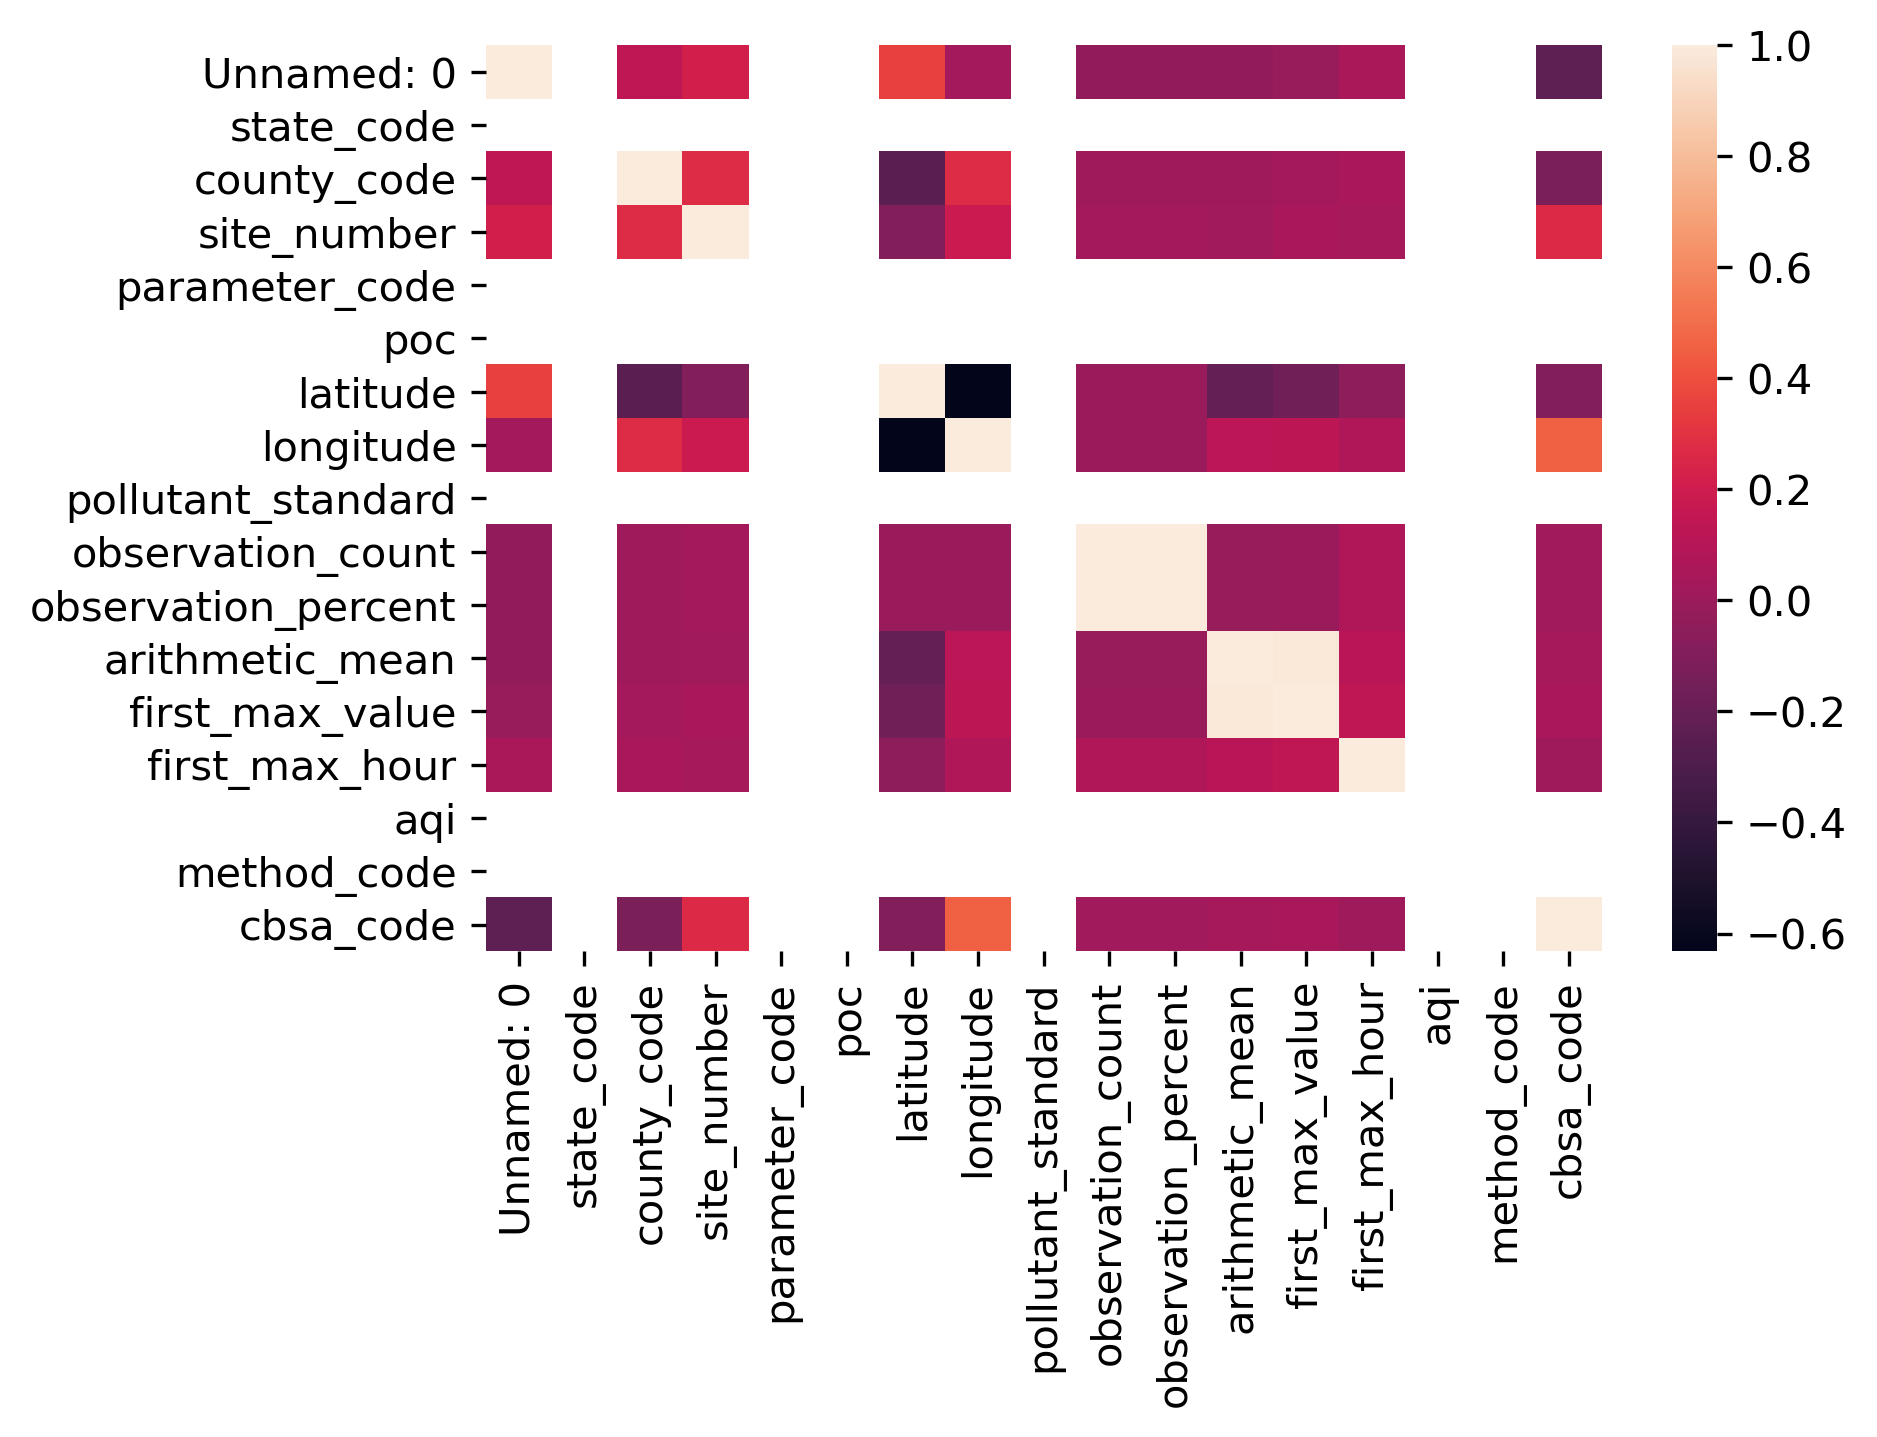

In [25]:

corr=TemperatureDf.corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(3)
# plt.matshow(corr)
# plt.show()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/filename.png',dpi=300)

In [26]:
missingValueCount=TemperatureDf.isnull().sum()
print(missingValueCount)

Unnamed: 0                0
state_code                0
county_code               0
site_number               0
parameter_code            0
poc                       0
latitude                  0
longitude                 0
datum                     0
parameter                 0
sample_duration           0
pollutant_standard     3117
date_local                0
units_of_measure          0
event_type                0
observation_count         0
observation_percent       0
validity_indicator        0
arithmetic_mean           0
first_max_value           0
first_max_hour            0
aqi                    3117
method_code               0
method                    0
local_site_name           0
site_address              0
state                     0
county                    0
city                      0
cbsa_code               304
cbsa                    304
date_of_last_change       0
dtype: int64


In [27]:
TemperatureDf.shape
list(TemperatureDf.columns) 
print(TemperatureDf['method_code'].unique())
print(TemperatureDf['pollutant_standard'].unique())
grouped=TemperatureDf.groupby(['pollutant_standard'])
print(grouped['pollutant_standard'].count())
print(TemperatureDf['sample_duration'].unique())
print(TemperatureDf['units_of_measure'].unique())
print(TemperatureDf['event_type'].unique())



[40]
[nan]
Series([], Name: pollutant_standard, dtype: int64)
['1 HOUR']
['Degrees Fahrenheit']
['None']


In [28]:
print(TemperatureDf['county'].unique())

['Chautauqua' 'Nassau' 'Putnam' 'Westchester' 'Queens' 'Monroe' 'Bronx'
 'Orange' 'Onondaga' 'Hamilton' 'Steuben']


In [29]:
#1. removing columns

#removing country_code and state_code because it is same for all data points




#2. removing rows
TemperatureDfNew=TemperatureDf[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','county','state']].copy()


#----begin converting date_local column type from object to datetime64-------

#3. parsing dates
TemperatureDfNew['date_local']=pd.to_datetime(TemperatureDfNew['date_local'])

# TemperatureDfNew.index=TemperatureDfNew['date_local']


#4. null value check

missingValueCount=TemperatureDfNew.isnull().sum()
print(missingValueCount)

                               



date_local               0
site_number              0
parameter                0
sample_duration          0
pollutant_standard    3117
validity_indicator       0
arithmetic_mean          0
first_max_value          0
aqi                   3117
local_site_name          0
county                   0
state                    0
dtype: int64


In [30]:
######Remove Invalid Values ######

print(TemperatureDfNew['validity_indicator'].unique())
grouped=TemperatureDfNew.groupby(['validity_indicator'])
print(grouped['validity_indicator'].count())


TemperatureDfNew = TemperatureDfNew[TemperatureDfNew['validity_indicator'] == "Y"] 
print(TemperatureDfNew.shape)
# TemperatureDfNew.to_csv('E:/projects/CSE-587-Air-Quality-Prediction-Model/CleanedData/ozone_ny_data_2020.csv')




['Y' 'N']
validity_indicator
N       9
Y    3108
Name: validity_indicator, dtype: int64
(3108, 12)


In [31]:
#5. duplicate check

duplicate = TemperatureDfNew[TemperatureDfNew.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    
print(duplicate)

    

Empty DataFrame
Columns: [date_local, site_number, parameter, sample_duration, pollutant_standard, validity_indicator, arithmetic_mean, first_max_value, aqi, local_site_name, county, state]
Index: []


In [32]:
#6. removing outliers using robust z-score --- use this

#plot some graph
med=np.median(TemperatureDfNew['arithmetic_mean'])
ma = stats.median_abs_deviation(TemperatureDfNew['arithmetic_mean'])
mad=np.median(ma)
TemperatureDfNew = TemperatureDfNew.query('(((0.6745*(arithmetic_mean-@med))/@mad)<3) & (((0.6745*(arithmetic_mean-@med))/@mad)>-3)')
print(TemperatureDfNew.shape)
TemperatureDfNew.describe()

(3108, 12)


,site_number,pollutant_standard,arithmetic_mean,first_max_value,aqi
count,3108.000000,0.0,3108.000000,3108.000000,0.0
mean,836.451416,NaN,50.335741,58.795045,NaN
std,1506.134015,NaN,19.521219,20.768580,NaN
min,3.000000,NaN,-8.583333,-3.000000,NaN
25%,5.000000,NaN,34.197916,41.000000,NaN
50%,124.000000,NaN,52.895834,62.000000,NaN
75%,1007.000000,NaN,67.583333,77.000000,NaN
max,5001.000000,NaN,90.958333,99.000000,NaN


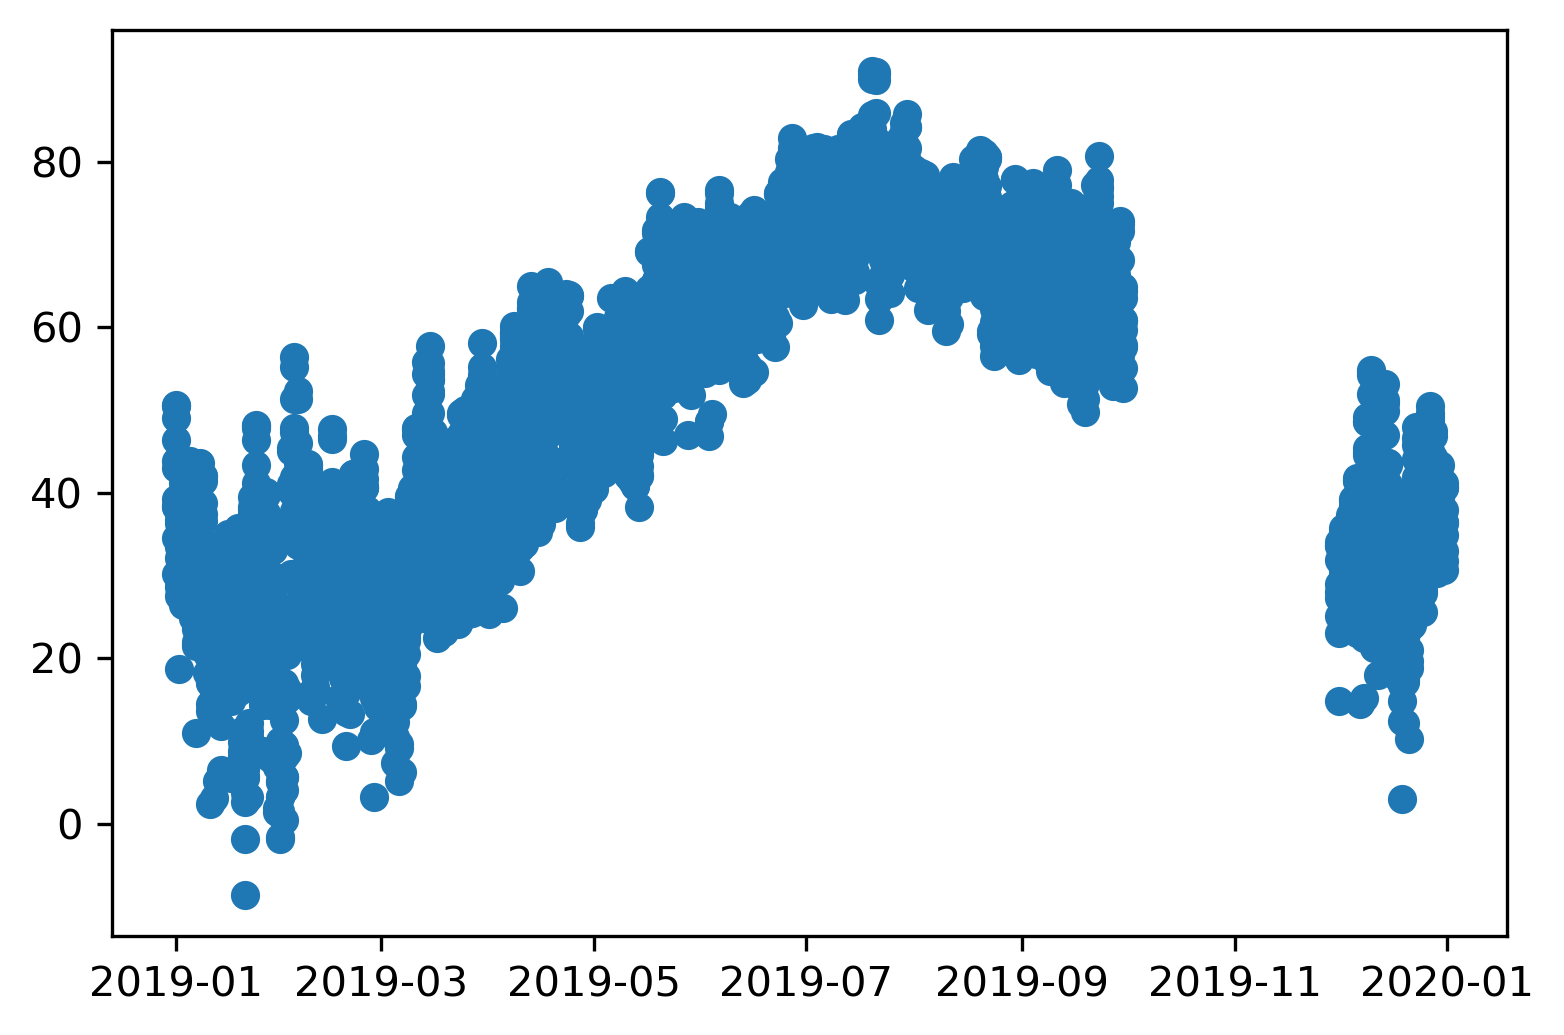

In [33]:
#group by date and average
plt.scatter(x=TemperatureDfNew['date_local'], y=TemperatureDfNew['arithmetic_mean'])

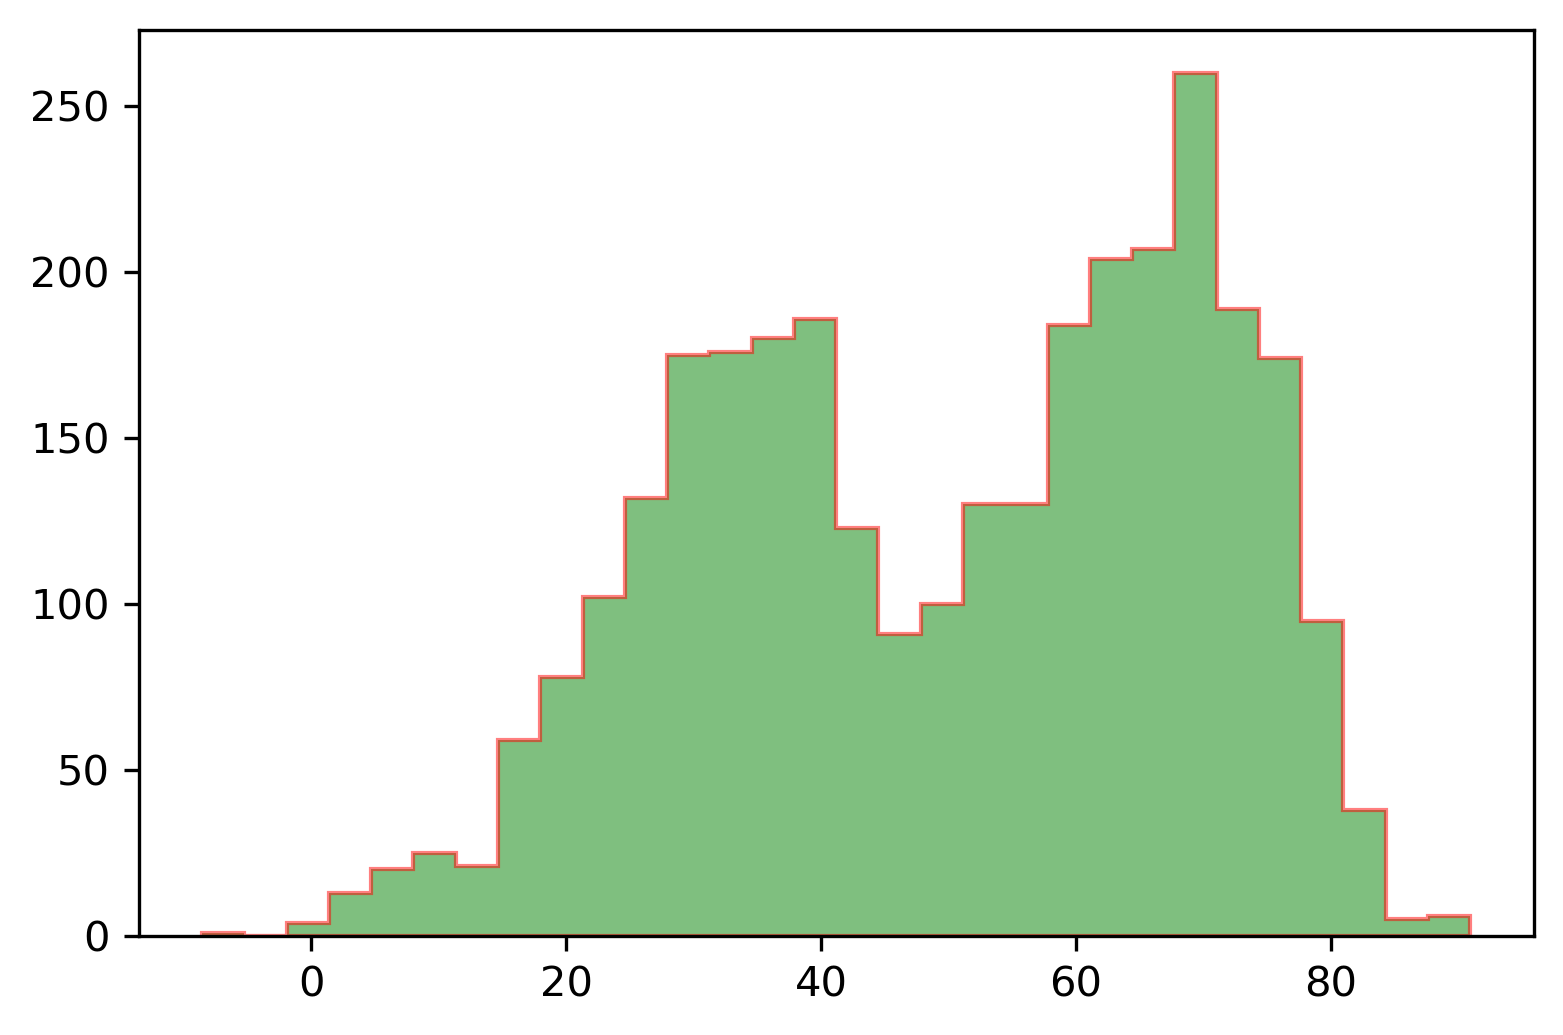

In [34]:
plt.hist(TemperatureDfNew['arithmetic_mean'], bins=30, alpha=0.5,
histtype='stepfilled', color='green',
edgecolor='red');

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


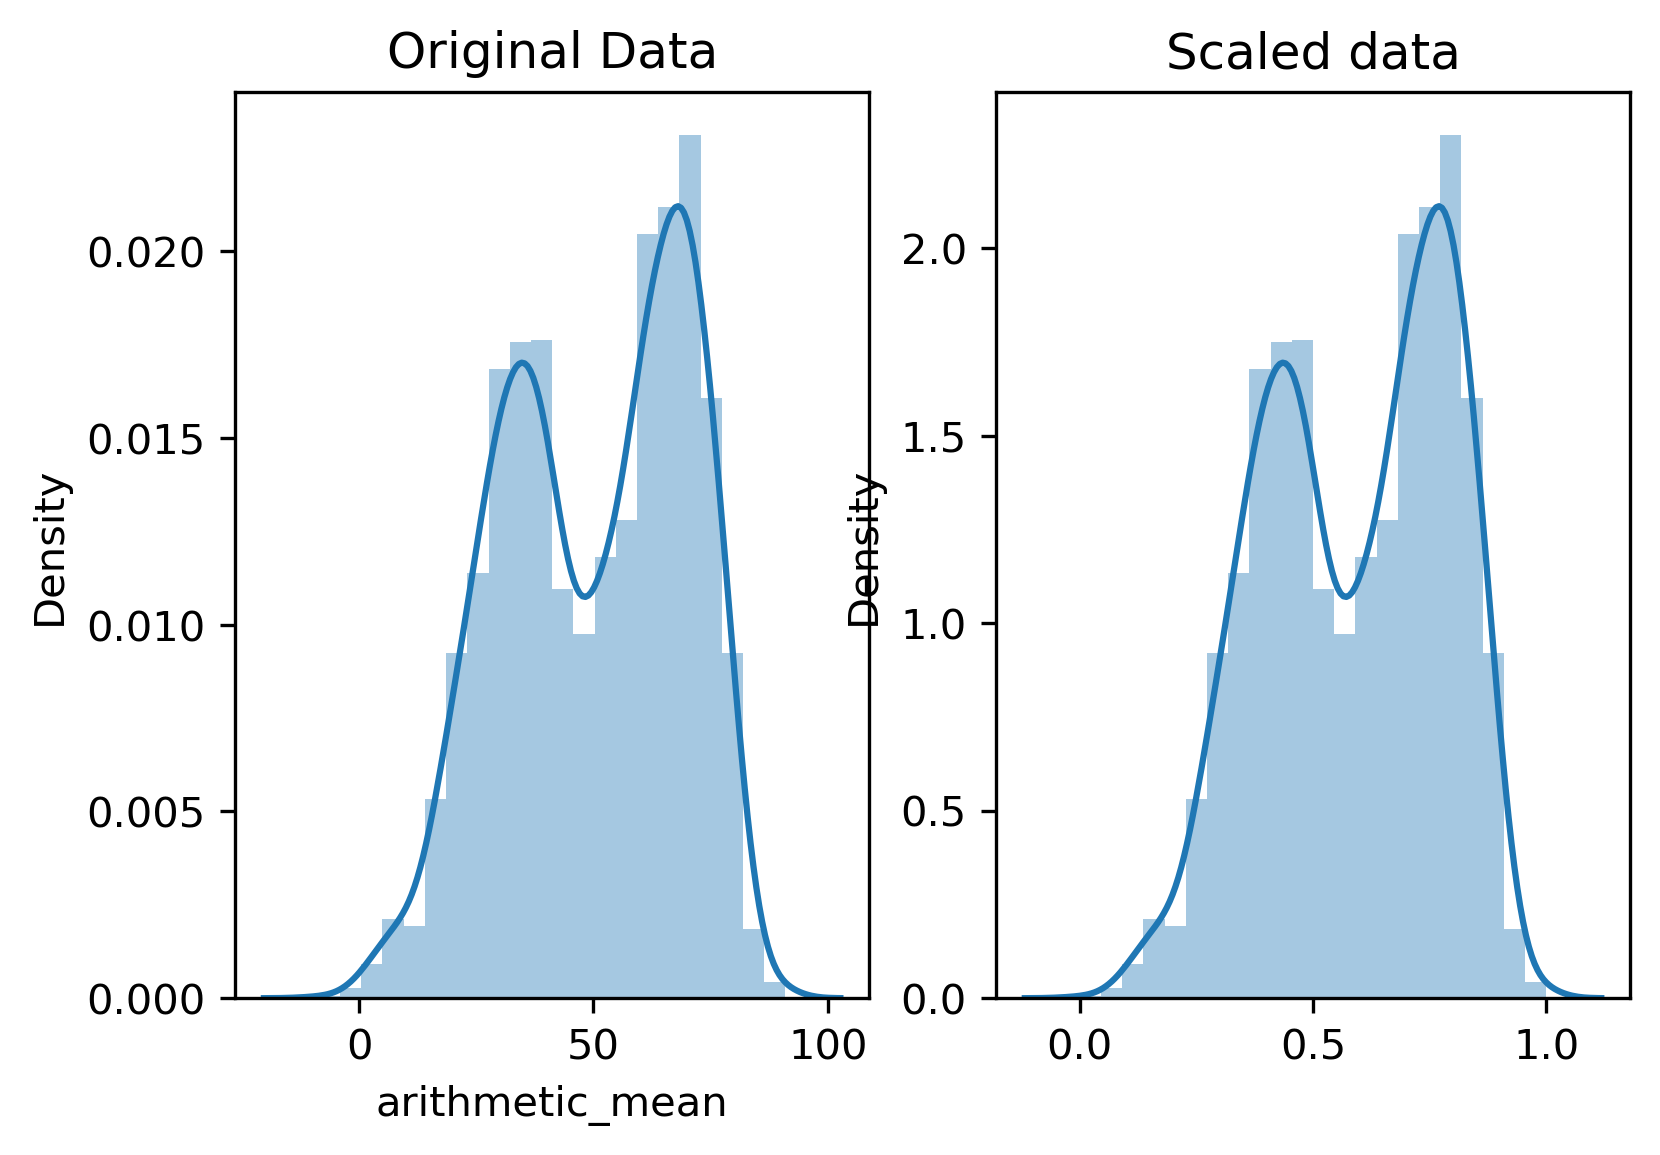

In [35]:
#7.scale

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(TemperatureDfNew['arithmetic_mean'].to_numpy().reshape(-1,1))
fig, ax=plt.subplots(1,2)

sns.distplot(TemperatureDfNew['arithmetic_mean'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
TemperatureDfNew['arithmetic_mean']=scaled_data

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

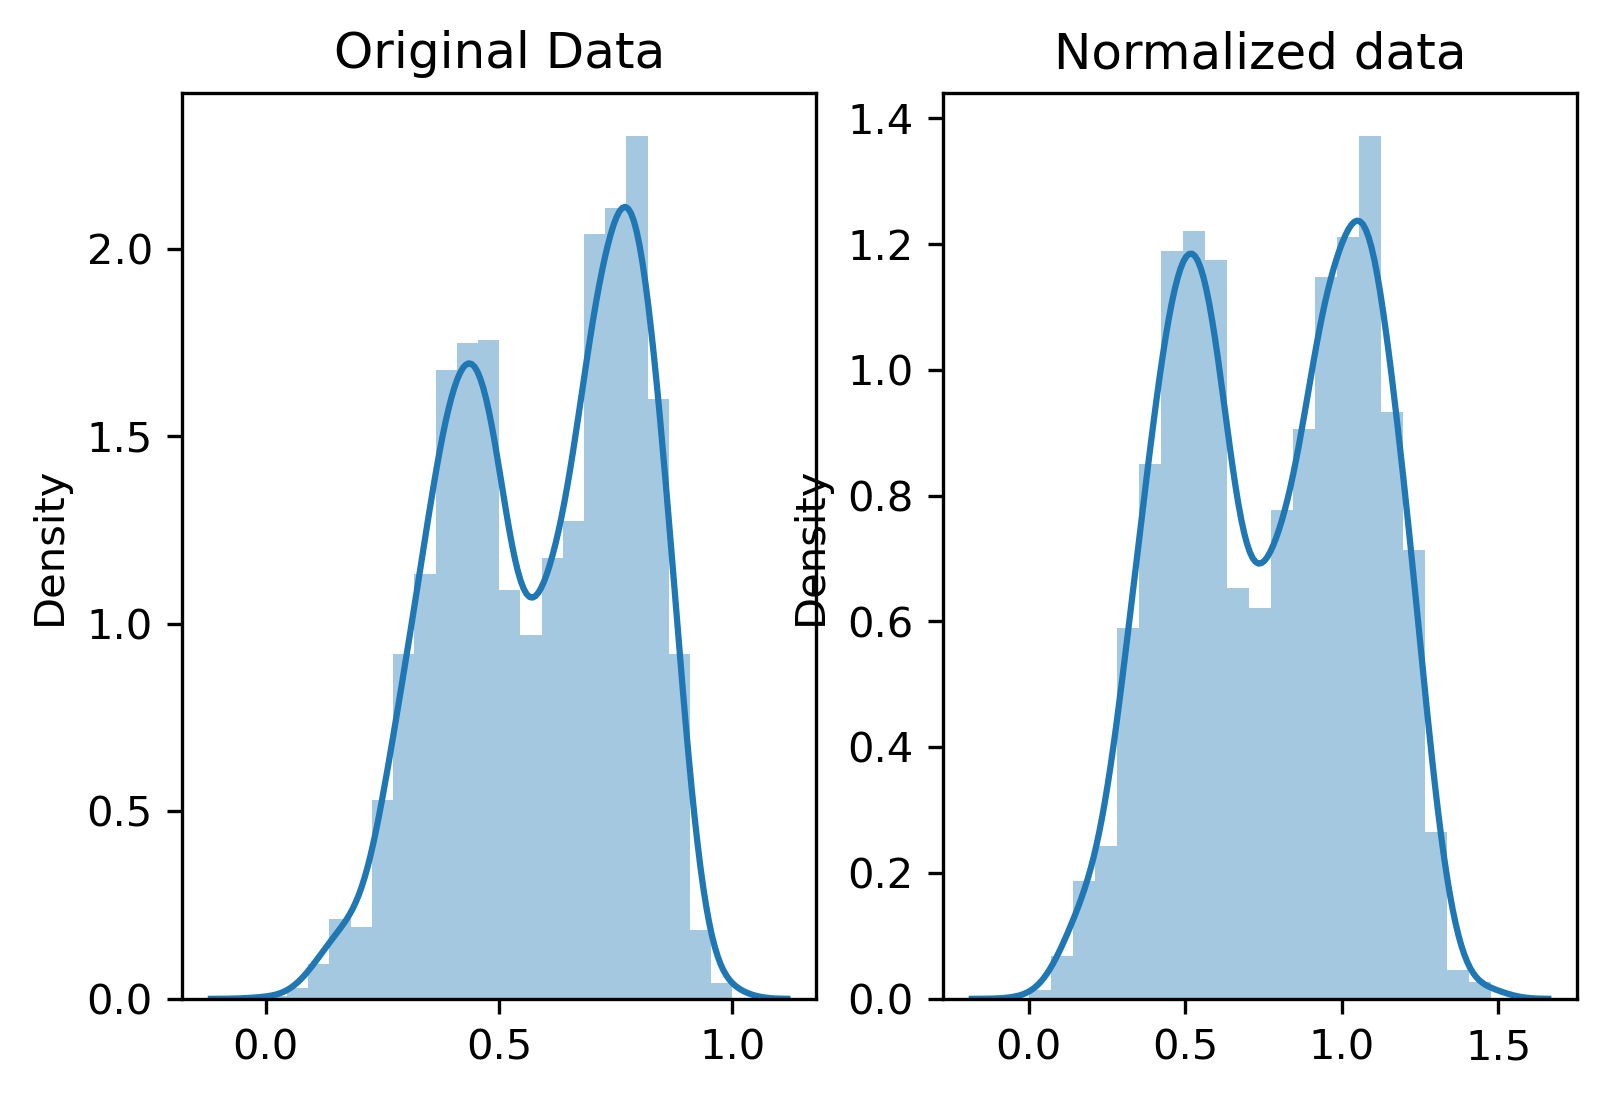

In [36]:
#8.normalize

normalized_data = stats.yeojohnson(TemperatureDfNew['arithmetic_mean'])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(scaled_data.flatten(), ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [ ]:
# 9. Adding season column


In [112]:
#11. filling missing values
#if time permits check data county wise and fill data for each day
#fix aqi missing value- max aqi in that county on that day
#fill pollutant_stand
ozoneData2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/Ozone_2019.csv")

ozoneData2020New=ozoneData2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','county','state']].copy()

ozoneData2020New = ozoneData2020New[ozoneData2020New['pollutant_standard'] == "Ozone 8-hour 2015"] 
ozoneData2020New['date_local']=pd.to_datetime(ozoneData2020New['date_local'])
carbonMonoOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/CarbonMonoOxide_2019.csv")
carbonMonoOxide2020New=carbonMonoOxide2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','county','state']].copy()

carbonMonoOxide2020New = carbonMonoOxide2020New[carbonMonoOxide2020New['pollutant_standard'] == "CO 8-hour 1971"] 
carbonMonoOxide2020New['date_local']=pd.to_datetime(carbonMonoOxide2020New['date_local'])
NitrogenDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/NitrogenDiOxide_2019.csv")
NitrogenDiOxide2020New=NitrogenDiOxide2020[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','county','state']].copy()

NitrogenDiOxide2020New = NitrogenDiOxide2020New[NitrogenDiOxide2020New['pollutant_standard'] == "NO2 1-hour"] 
NitrogenDiOxide2020New['date_local']=pd.to_datetime(NitrogenDiOxide2020New['date_local'])
sulfurDiOxide2020=pd.read_csv("E:/projects/CSE-587-Air-Quality-Prediction-Model/RawData/RawData2019/SulfurDiOxide_2019.csv")
sulfurDiOxide2020New=sulfurDiOxide2020[['date_local','county_code','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi','method_code',
                                'local_site_name','county','state']].copy()

sulfurDiOxide2020New = sulfurDiOxide2020New[sulfurDiOxide2020New['pollutant_standard'] == "SO2 1-hour 2010"] 
sulfurDiOxide2020New['date_local']=pd.to_datetime(sulfurDiOxide2020New['date_local'])

count=0

for index,row in TemperatureDfNew.iterrows():
    oseries=ozoneData2020New[(ozoneData2020New['date_local'] == row['date_local']) & (ozoneData2020New['county']==row['county'])]['aqi']
    if(oseries.empty):
        oaqi=0
    else:
        oaqi= oseries.max()
        
    cseries=carbonMonoOxide2020New[(carbonMonoOxide2020New['date_local'] == row['date_local']) & (carbonMonoOxide2020New['county']==row['county'])]['aqi']
    if(cseries.empty):
        coaqi=0
    else:
        coaqi= cseries.max()
        
    noseries=NitrogenDiOxide2020New[(NitrogenDiOxide2020New['date_local'] == row['date_local']) & (NitrogenDiOxide2020New['county']==row['county'])]['aqi']
    if(noseries.empty):
        noaqi=0
    else:
        noaqi= noseries.max()

    soseries=sulfurDiOxide2020New[(sulfurDiOxide2020New['date_local'] == row['date_local']) & (sulfurDiOxide2020New['county']==row['county'])]['aqi']
    if(soseries.empty):
        soaqi=0
    else:
        soaqi= soseries.max()
    
    z=max(oaqi,coaqi,noaqi,soaqi)
    if(z==0):
        count=count+1
    TemperatureDfNew.at[index,'aqi'] = z    
    
#     TemperatureDfNew.loc[index]['aqi']=max(oaqi,coaqi,noaqi,soaqi)
    

print("ends")    
    
    
print(count)    
missingValueCount=TemperatureDfNew.isnull().sum()
print(missingValueCount)



# ozoneData2020['date_local']=pd.to_datetime(ozoneData2020['date_local'])
# x=TemperatureDfNew['date_local'][0]
# y=ozoneData2020['date_local'][0]
# print(y)
# # x=ozoneData2020['date_local'].dt.strftime()
# # kk=ozoneData2020.loc(ozoneData2020['date_local'].isin([x]))

# print(ozoneData2020['date_local'][3])
# print(TemperatureDfNew['date_local'][0])

# kk=ozoneData2020[(ozoneData2020['date_local'] == TemperatureDfNew['date_local'][0]) & (ozoneData2020['county']== TemperatureDfNew['county'][0])]
# # print(TemperatureDfNew['county'][0]) 
# print(kk['pollutant_standard'])

ends
395
date_local               0
site_number              0
parameter                0
sample_duration          0
pollutant_standard    3108
validity_indicator       0
arithmetic_mean          0
first_max_value          0
aqi                      0
local_site_name          0
county                   0
state                    0
dtype: int64


In [ ]:
#10 . Merging


In [ ]:
sns.pairplot(df, hue="species")